In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
# read the data/Amazon_Unlocked_Mobile.csv file into a DataFrame
data = pd.read_csv('data/Amazon_Unlocked_Mobile.csv')

In [4]:
data.columns

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')

In [5]:
# make sure review Votes are ints, fillna with 0
data['Review Votes'] = data['Review Votes'].fillna(0).astype(float)
# are there negative review votes?
data[data['Review Votes'] < 0]

Empty DataFrame
Columns: [Product Name, Brand Name, Price, Rating, Reviews, Review Votes]
Index: []

Text(0.5, 1.0, 'Review Votes Distribution')

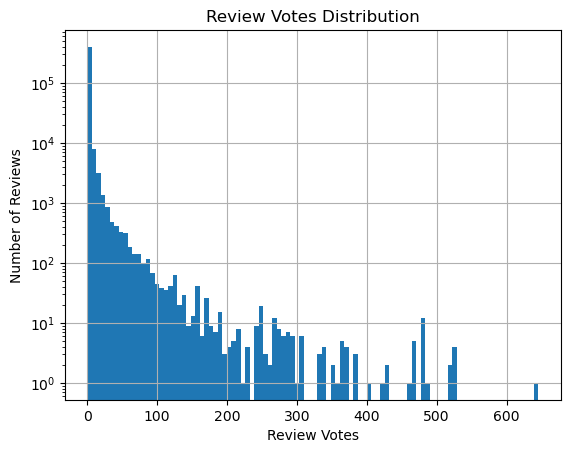

In [6]:
# plot the distribution of Review Votes?
data['Review Votes'].hist(bins=100,log=True)
# add labels
plt.xlabel('Review Votes')
plt.ylabel('Number of Reviews')
plt.title('Review Votes Distribution')


In [7]:
# Query the unique Brands
len(data['Brand Name'].unique())

385

In [8]:
# Query the unique Products
len(data['Product Name'].unique())

4410

In [9]:
# are there any missing values?
data.isnull().any()

Product Name    False
Brand Name       True
Price            True
Rating          False
Reviews          True
Review Votes    False
dtype: bool

In [10]:
# How many missing values are there?
data.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes        0
dtype: int64

<AxesSubplot: >

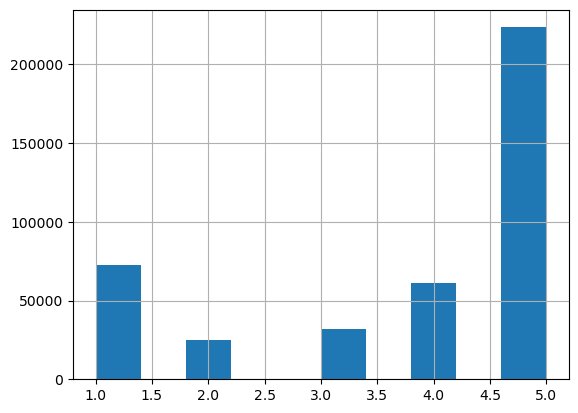

In [11]:
# Plot a rating distribution
data['Rating'].hist()

In [12]:
data[data['Brand Name'] == "Apple"]

Product Name Brand Name  Price  \
3081    Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...      Apple   33.0   
3082    Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...      Apple   33.0   
3083    Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...      Apple   33.0   
3084    Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...      Apple   33.0   
3085    Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...      Apple   33.0   
...                                                   ...        ...    ...   
410273                       Virgin Mobile iPhone 5 Black      Apple  289.0   
410274                       Virgin Mobile iPhone 5 Black      Apple  289.0   
410275                       Virgin Mobile iPhone 5 Black      Apple  289.0   
410276                       Virgin Mobile iPhone 5 Black      Apple  289.0   
410277                       Virgin Mobile iPhone 5 Black      Apple  289.0   

        Rating                                            Reviews  \
3081         5  Was a gift for my husband and he loves it. Rep...   
3082         5  Great price, extremely fast shipping works as ...   
3083         4  Moving from Android to Apple...my kids have th...   
3084         4  It is compatible with Verizon. Not pink but PE...   
3085         5              I love this phone! Thank you so much.   
...        ...                                                ...   
410273       5  It came as a new item. No scratches. Works per...   
410274       1  In fact, this phone could not be activated by ...   
410275       5                                        Nice phone.   
410276       2  Why Is This iPhone Locked ?? And Only Came Wit...   
410277       2  Shipped fast. Says its for virgin mobile when ...   

        Review Votes  
3081             5.0  
3082             1.0  
3083             1.0  
3084             0.0  
3085             1.0  
...              ...  
410273           1.0  
410274           1.0  
410275           0.0  
410276           4.0  
410277           1.0  

[58186 rows x 6 columns]

In [13]:
# make sure the reviews are strings, replace nans by an empty string
data['Reviews'] = data['Reviews'].astype(str)
data['Reviews'] = data['Reviews'].apply(lambda x: x.replace('nan', ''))

In [14]:
# how many words are there in each review?
data['review_length'] = data['Reviews'].apply(lambda x: len(x.split()))


In [15]:
# what is the sum of all review lengths?
data['review_length'].sum()

16754756

In [16]:
# How many characters do the reviews sum to?
data['Reviews'].apply(len).sum()

89664763

In [17]:
# Plot the distribution of review length in a log plot, with 50 bins
data['Reviews'].apply(len).hist(bins=100, log=True)
# label x axis
plt.xlabel('Review Length')
# label y axis
plt.ylabel('Frequency')
# add a title
plt.title('Review Length Distribution')
# show plot
plt.show()

In [18]:
# get the most reviewed product
reviews_per_product = data['Product Name'].value_counts()

len(reviews_per_product)

4410

Text(0.5, 1.0, 'Reviews per Product Distribution')

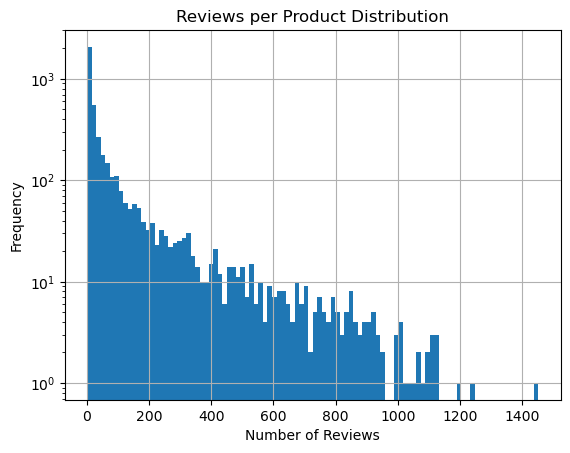

In [19]:
# plot the distribution of reviews per product
reviews_per_product.hist(bins=100, log=True)
# label x axis
plt.xlabel('Number of Reviews')
# label y axis
plt.ylabel('Frequency')
# add a title
plt.title('Reviews per Product Distribution')

In [20]:
reviews_per_product

Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)                                    1451
Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera - Unlocked - Black (Certified Refurbished)                                 1241
BLU Studio 5.0 C HD Unlocked Cellphone, Black                                                                           1194
OtterBox Iphone 5/5S/SE Defender Case w/ Drop and Dust Proctection - Realtree AP Pink                                   1129
Motorola Moto E (1st Generation) - Black - 4 GB - Global GSM Unlocked Phone                                             1127
                                                                                                                        ... 
Samsung Galaxy express Prime Unlocked 4G LTE J320A 16GB Quad Core LCD 5" Android 6.0 Desbloqueado                          1
Samsung Galaxy J1 Ace J111M 8GB Unlocked GSM Quad-Core Android LolliPop Smartphone - Black (International Version)         1


In [21]:
# Let's compute for each product the average rating
average_rating_per_product = data.groupby('Product Name')['Rating'].mean()

In [24]:
# order the products by average rating
average_rating_per_product = average_rating_per_product.sort_values(ascending=False)

In [28]:
average_rating_per_product

Product Name
Samsung Galaxy J2 SM-J200H/DS DUOS Dual SIM Unlocked GSM Android Smartphone 4.7" inch Super AMOLED Disply (White )             5.0
Samsung Galaxy J1 (2016) Duos SM-J120H/DS 8GB Dual SIM Unlocked GSM Smartphone - International Version, No Warranty (Black)    5.0
Nokia N72 Unlocked Cell Phone with 2 MP Camera, MP3/Video Player, SD/MMC--International Version with Warranty (Black)          5.0
Samsung Galaxy Grand Prime Smartphone - Unlocked - White                                                                       5.0
Nokia N81 2gb Unlocked GSM Quad-band Cell Phone                                                                                5.0
                                                                                                                              ... 
Samsung Galaxy On7 8GB SM-G6000 - 5.5" HD GSM Factory Unlocked Dual SIM International Version (Gold)                           1.0
Nokia 8850                                                            

In [29]:
product = '"CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN'
# get the index of the product
index = average_rating_per_product.index.get_loc(product)
print(index / len(average_rating_per_product))

0.5405895691609978


In [ ]:
# compute the top n percent 

In [34]:
# filter all reviews for the product
product_reviews = data[data['Product Name'] == product]
# count the number of reviews per rating
vc = product_reviews['Rating'].value_counts()
# order the number of reviews per rating
vc = vc.sort_index()
print(vc)
# convert to a numpy array
vc = vc.values
vc

1     5
2     4
3     4
4     8
5    16
Name: Rating, dtype: int64


array([ 5,  4,  4,  8, 16])

# NLP

In [22]:
import spacy
import pyLDAvis.gensim_models


ImportError: cannot import name 'ModelMetaclass' from 'pydantic.main' (/Users/kasimirtanner/opt/anaconda3/envs/ada/lib/python3.9/site-packages/pydantic/main.py)

In [ ]:
iphone_4s = data[data['Product Name'] == 'Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)']
iphone_4s = data[data['Product Name'] == 'BLU Studio 5.0 C HD Unlocked Cellphone, Black']
iphone_4s = data[data['Product Name'] == 'OtterBox Iphone 5/5S/SE Defender Case w/ Drop and Dust Proctection - Realtree AP Pink    ']

In [ ]:
# keep only the reviews where the rating is below or equal to 3
iphone_4s = iphone_4s[iphone_4s['Rating'] <= 3]

# # keep only the reviews where there are more than 10 Review Votes
# iphone_4s = iphone_4s[iphone_4s['Review Votes'] >= 1]

In [ ]:
# get the top 10 reviews by Review Votes
iphone_4s = iphone_4s.sort_values(by='Review Votes', ascending=False)[:10]
iphone_4s

Empty DataFrame
Columns: [Product Name, Brand Name, Price, Rating, Reviews, Review Votes, review_length]
Index: []

In [ ]:
# create a list of all reviews
reviews = list(iphone_4s['Reviews'])
reviews

["I had originally given this a 4 star rating because although it had problems it also offers a lot of great features for the price...fast forward a couple weeks and the phone is no longer working. Nothing happened to the phone but it randomly quit working. No new apps, no updates, no falls, no moisture...it just suddenly started restarting repeatedly. It would do that for a minute or so then shut off and I couldn't get it to come back up without a battery pull. Now it won't come back on at all, the screen just flashes. I did try a factory reset during one of the few times it last that long but it didn't help. Removing the sim and memory card didn't help and neither did updating it. I wrote customer service via the blu products website yesterday but I haven't gotten any type of response yet. Looking online showed that it's not an uncommon problem with this phone. I'll give more stars if they fix the problem without a hassle.Other bad things to keep in mind: The time zone sets wrong and

In [ ]:
len(reviews)

2

In [ ]:
# print the max length of a review
max([len(review) for review in reviews])

4337

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

processed_docs = list()
for doc in nlp.pipe(reviews, n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
docs = processed_docs
del processed_docs

In [ ]:
docs

[['originally',
  'star',
  'rating',
  'problem',
  'offer',
  'lot',
  'great',
  'feature',
  'price',
  'fast',
  'forward',
  'couple',
  'week',
  'phone',
  'long',
  'work',
  'happen',
  'phone',
  'randomly',
  'quit',
  'work',
  'new',
  'app',
  'update',
  'fall',
  'moisture',
  'suddenly',
  'start',
  'restart',
  'repeatedly',
  'minute',
  'shut',
  'come',
  'battery',
  'pull',
  'come',
  'screen',
  'flash',
  'try',
  'factory',
  'reset',
  'time',
  'long',
  'help',
  'remove',
  'sim',
  'memory',
  'card',
  'help',
  'update',
  'write',
  'customer',
  'service',
  'blu',
  'product',
  'website',
  'yesterday',
  'type',
  'response',
  'look',
  'online',
  'uncommon',
  'problem',
  'phone',
  'star',
  'fix',
  'problem',
  'hassle',
  'bad',
  'thing',
  'mind',
  'time',
  'zone',
  'set',
  'wrong',
  'change',
  'time',
  'phone',
  'die',
  'battery',
  'pull',
  'automatic',
  'time',
  'zone',
  'feature',
  'need',
  'disable',
  'alarm',
  'w

In [ ]:
# Add bigrams too
from gensim.models.phrases import Phrases

# Add bigrams to docs (only ones that appear 15 times or more).
bigram = Phrases(docs, min_count=15)

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [ ]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)

# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.99
min_wordcount = 5
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of chunks: %d' % len(corpus))

Number of unique tokens: 0
Number of chunks: 2


In [ ]:
# models
from gensim.models import LdaMulticore
params = {'passes': 10, 'random_state': 42}
base_models = dict()
model = LdaMulticore(corpus=corpus, num_topics=5, id2word=dictionary, workers=6,
                passes=params['passes'], random_state=params['random_state'])

ValueError: cannot compute LDA over an empty collection (no terms)

In [ ]:
model.show_topics(num_words=5)

[(0,
  '0.239*"buy" + 0.218*"battery" + 0.154*"time" + 0.132*"disappointed" + 0.128*"charge"'),
 (1,
  '0.551*"unlocked" + 0.193*"phone" + 0.134*"receive" + 0.013*"buy" + 0.012*"Amazon"'),
 (2,
  '0.190*"got" + 0.190*"return" + 0.190*"battery" + 0.189*"phone" + 0.103*"Amazon"'),
 (3,
  '0.405*"phone" + 0.123*"iphone" + 0.078*"receive" + 0.063*"time" + 0.054*"battery"'),
 (4,
  '0.283*"Verizon" + 0.223*"unlocked" + 0.207*"phone" + 0.160*"return" + 0.025*"charge"')]

In [ ]:
model.show_topic(1,20)

[('unlocked', 0.5510855),
 ('phone', 0.1925209),
 ('receive', 0.13398682),
 ('buy', 0.012550191),
 ('Amazon', 0.0123878755),
 ('disappointed', 0.012254888),
 ('time', 0.012174658),
 ('battery', 0.012173581),
 ('Verizon', 0.012173493),
 ('return', 0.01217337),
 ('iphone', 0.012173284),
 ('charge', 0.012173125),
 ('got', 0.0121723665)]

In [ ]:
sorted(model[corpus[0]],key=lambda x:x[1],reverse=True)

[(1, 0.59832895),
 (4, 0.1014515),
 (3, 0.10020832),
 (0, 0.100008324),
 (2, 0.100002885)]

In [ ]:
# plot topics
data =  pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(data)

/Users/kasimirtanner/opt/anaconda3/envs/ada/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [ ]:
# assignment
sent_to_cluster = list()
for n,doc in enumerate(corpus):
    if doc:
        cluster = max(model[doc],key=lambda x:x[1])
        sent_to_cluster.append(cluster[0])
    else:
        sent_to_cluster.append(None)

In [ ]:
# assign each review to a cluster
iphone_4s['cluster'] = sent_to_cluster

In [ ]:
# group by cluster
iphone_4s.groupby('cluster')['Reviews'].count()

cluster
0     5
1     5
2     3
3    10
4     4
Name: Reviews, dtype: int64

In [ ]:
# assign doc to the iphone_4s dataframe
iphone_4s['doc'] = docs

In [ ]:

# get the most representative review for each cluster by obtaining the top 5 reviews by Review Votes
grouped = iphone_4s.groupby('cluster').apply(lambda x: x.nlargest(5,'Review Votes'))



In [ ]:
grouped

Product Name  \
cluster                                                                                               
0       17234  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        17268  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        17087  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        16755  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        17634  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
1       17119  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        16501  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        17421  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        16882  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        17731  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
2       17183  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        16841  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        17450  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
3       16885  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        17734  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        16624  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        17843  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        16997  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
4       16629  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        17848  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        17022  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   
        17419  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)   

              Brand Name  Price  Rating  \
cluster                                   
0       17234        NaN  99.99       1   
        17268        NaN  99.99       2   
        17087        NaN  99.99       1   
        16755        NaN  99.99       2   
        17634        NaN  99.99       2   
1       17119        NaN  99.99       1   
        16501        NaN  99.99       1   
        17421        NaN  99.99       1   
        16882        NaN  99.99       1   
        17731        NaN  99.99       1   
2       17183        NaN  99.99       1   
        16841        NaN  99.99       1   
        17450        NaN  99.99       1   
3       16885        NaN  99.99       1   
        17734        NaN  99.99       1   
        16624        NaN  99.99       1   
        17843        NaN  99.99       1   
        16997        NaN  99.99       1   
4       16629        NaN  99.99       3   
        17848        NaN  99.99       3   
        17022        NaN  99.99       1   
        17419        NaN  99.99       1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
# remove max colwidth
pd.set_option('display.max_colwidth', None)
grouped["Reviews"]

cluster       
0.0      17119                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Yeah, so don't buy this phone. It's not unlocked. These dudes are either incompetent, scamma-lamma-ding-donging us, or unable to articulate exactly what they think "unlocked" means.
16.0     16885    Extremely disappointed.I purchased the phone as unlocked. It had ATT label on the box and did not read my SIM card. I called and got a replacement which was no different than the first one (also locked). T